In [1]:
# first import the important libraries to analyse the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 . State Wise Crime Distribution (2001-2012)

         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23     

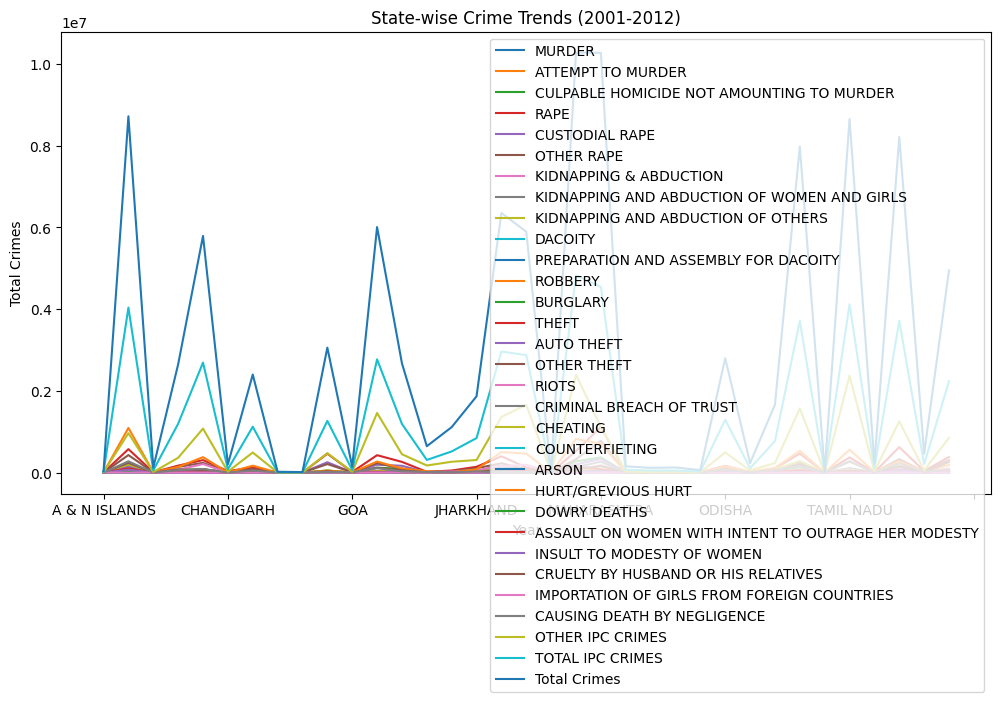

In [2]:
# load the data at csv formate to from dataframe
crime_data = "https://github.com/jhhalls/Crime-Project/raw/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
df = pd.read_csv(crime_data)

# Displaying the first few rows to understand the structure of the dataset
print(df.head())

# Checking the column names and data types
print(df.columns)
# Clean up the column names 
df.columns = df.columns.str.strip()

# Checking for any missing values.
print(df.isnull().sum())

#  let's drop the  rows with missing values 
df = df.dropna()

# now selecting  columns related to state and crime data
# Assuming the first two columns are 'State' and 'District' and crime data starts from index 3 onward
crime_columns = df.columns[3:]

# Display the cleaned dataset's first few rows to confirm
print(df.head())

# Sum the crimes for each state across all districts and years
df_statewise = df.groupby('STATE/UT')[crime_columns].sum()

# Calculate the total crime for each state
df_statewise['Total Crimes'] = df_statewise.sum(axis=1)

# Display the total crimes per state
print(df_statewise[['Total Crimes']])

# now analyse the state wise crime trends 
# visualizing in the form of line graph
df_statewise.plot(kind='line', figsize=(12, 6))
plt.title("State-wise Crime Trends (2001-2012)")
plt.ylabel("Total Crimes")
plt.xlabel("Year")

plt.show()




2. HIGHEST CRIME RATE STATE :- Determine the top five states with the highest crime rates
across all crime categories.

In [ ]:
# Loading the appropriate data for the analysis
highest_crime_rate = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
data = pd.read_csv(highest_crime_rate)

# Display the first few rows of the dataframe
print(data.head())

# Check the columns to understand the structure
print(data.columns)


# Group by 'State' and sum the crimes across all categories
# we should adjust the column name to match the actual column name from the data
crime_columns = [col for col in data.columns if 'IPC' in col]  
total_crimes = data.groupby('STATE/UT')[crime_columns].sum().reset_index()

# Calculate total crimes for each state
total_crimes['Total_Crimes'] = total_crimes[crime_columns].sum(axis=1)

# Get the top 5 states with the highest total crimes
top_states = total_crimes.nlargest(5, 'Total_Crimes')

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Crimes', y='STATE/UT', data=top_states, palette='viridis' , hue='STATE/UT',legend=True)
plt.title('Top 5 States with Highest Crime Rates (2001-2012)')
plt.xlabel('Total Crimes')
plt.ylabel('STATE/UT')
plt.show()

3. CITY (DISTRICT ) WISE CRIME DISTRIBUTION :- For each state, identify the top six cities with the highest
recorded crime incidents.

In [ ]:
# Load the suitable data
city_wise_crime = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
data = pd.read_csv(city_wise_crime)

# Display the first few rows of the dataframe
print(data.head())

# Check the columns to understand the structure
print(data.columns)

# Group by 'State' and 'City' and sum the crimes across all categories
crime_columns = [col for col in data.columns if 'IPC' in col]  
city_crimes = data.groupby(['STATE/UT', 'DISTRICT'])[crime_columns].sum().reset_index()

# Calculate total crimes for each city
city_crimes['Total_Crimes'] = city_crimes[crime_columns].sum(axis=1)

# For each state, get the top 6 cities with the highest total crimes
top_cities = city_crimes.groupby('STATE/UT').apply(lambda x: x.nlargest(6, 'Total_Crimes')).reset_index(drop=True)

# Visualize the results
sns.set(style="whitegrid")

# Creating a bar plot for each state
unique_states = top_cities['STATE/UT'].unique()

for state in unique_states:
    state_data = top_cities[top_cities['STATE/UT'] == state]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Total_Crimes', y='DISTRICT', data=state_data, palette='viridis',hue='DISTRICT',legend=True)
    plt.title(f'Top 6 Cities with Highest Crime Incidents in {state}')
    plt.xlabel('Total Crimes')
    plt.ylabel('Cities')
    plt.show()

4. Crimes Against Women: Identify the top five cities with the highest number of crimes
committed against women.

In [ ]:
# Loading the suitable data
case_against_women = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/42_District_wise_crimes_committed_against_women_2001_2012.csv"
data_of_women = pd.read_csv(case_against_women)

# Display the first few rows of the dataframe
print(data_of_women.head())

# Checking the columns for better understanding the structure
print(data_of_women.columns)




# placing 'Crimes_Against_Women' with all crime columns
crimes_against_women_column = ['Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']


# Group by 'City' and sum the crimes against women
# Here city is the district in the data
city_crimes_women = data_of_women.groupby('DISTRICT')[crimes_against_women_column].sum().reset_index()

# Getting the top 5 cities with the highest number of crimes against women
top_cities_women = city_crimes_women.nlargest(7, crimes_against_women_column)
print(top_cities_women)

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x=crimes_against_women_column, y='DISTRICT', data=top_cities_women, palette='viridis', hue='DISTRICT',legend=True)
plt.title('Top 5 Cities with Highest Crimes Against Women (2001-2012)')
plt.xlabel('Total Crimes Against Women')
plt.ylabel('DISTRICT')
plt.show()

5. Safest States for Women: Determine the top five states that are statistically the safest for
women, based on crime rates related to women’s safety.

In [ ]:
# # Loading the data with
# safest_state_for_women = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/42_Cases_under_crime_against_women.csv"
safest_state_for_women = "C:\\Users\\only1\\Downloads\\42_District_wise_crimes_committed_against_women_2001_2012 (1).csv"
data = pd.read_csv(safest_state_for_women)

try: # used because of error handling of the file
    data = pd.read_csv(safest_state_for_women)
except Exception as e:
    print(f"Error loading data: {e}")

# # Displaying the first few rows of the dataframe
print(data.head())

# # Checking the columns to understand the structure
print(data.columns)

# # Checking the data types of the  each columns
print(data.dtypes)

# # Group by State and sum the incidents of crimes against women
# # adjust the column names based on the actual data.
crime_columns = [ 'Rape', 'Kidnapping and Abduction','Dowry Deaths', 
                 'Assault on women with intent to outrage her modesty','Insult to modesty of Women', 
                 'Cruelty by Husband or his Relatives','Importation of Girls'] 

# # Checking if the crime columns exist in the DataFrame
for col in crime_columns:
    if col not in data.columns:
        print(f"Column '{col}' not found in the dataset.")

# # Group by State and sum the incidents of crimes against women
state_crime_summary = data.groupby('STATE/UT')[crime_columns].sum().reset_index()

# # Calculating  the total crimes against women for each state
state_crime_summary['Total_Crimes'] = state_crime_summary[crime_columns].sum(axis=1)

# # Determine the top 5 safest states (with the lowest total crimes)
safest_states = state_crime_summary.nsmallest(5, 'Total_Crimes')

# # Displaying the results
print(safest_states)

# # Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Crimes', y='STATE/UT', data=safest_states, palette='viridis',hue='STATE/UT',legend=True)
plt.title('Top 5 Safest States for Women Based on Crime Rates')
plt.xlabel('Total Crimes Against Women')
plt.ylabel('States')
plt.show()



6. Safest Cities for Women: Identify the top five cities with the lowest crime rates against
women.

In [ ]:
# Loading the data
# link = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/42_Cases_under_crime_against_women.csv"
data = pd.read_csv("C:\\Users\\only1\\Downloads\\42_District_wise_crimes_committed_against_women_2001_2012.csv")

# Display the first few rows of the dataframe
print(data.head())

# Check the columns to understand the structure
print(data.columns)

# Group by City and sum the incidents of crimes against women
#  adjusting the column names based on the actual data
crime_columns = ['Rape', 'Kidnapping and Abduction','Dowry Deaths', 
                 'Assault on women with intent to outrage her modesty','Insult to modesty of Women', 
                 'Cruelty by Husband or his Relatives','Importation of Girls']  

# Checking if the crime columns exist in the DataFrame or  not
for col in crime_columns:
    if col not in data.columns:
        print(f"Column '{col}' not found in the dataset.")

# Group by City and sum the incidents of crimes against women
city_crime_summary = data.groupby('DISTRICT')[crime_columns].sum().reset_index() # here city is the district column

# Calculating the total crimes against women for each city
city_crime_summary['Total_Crimes'] = city_crime_summary[crime_columns].sum(axis=1)

# Determine the top 5 safest cities (with the lowest total crimes)
safest_cities = city_crime_summary.nsmallest(5, 'Total_Crimes')

# Display the results
print(safest_cities)

# Visualize the data output
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Crimes', y='DISTRICT', data=safest_cities, palette='viridis', hue='DISTRICT' , legend=True) # Here graph is blank because the top 5 cities has 0 crime rate
plt.title('Top 5 Safest Cities for Women Based on Crime Rates')
plt.xlabel('Total Crimes Against Women')
plt.ylabel('DISTRICT')
plt.show()

7. Juvenile Crime Analysis:-
- a. Identify the top three reasons at the state level for juveniles (individuals under 18
years of age) being involved in crimes.

In [ ]:
# Load suitable the dataset
juvenile_data = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/08_01_Juvenile_apprehended_state_IPC.csv"
juvenile_df = pd.read_csv(juvenile_data)

# Display the first few rows to check the structure
print(juvenile_df.head())

# Group the data by 'CRIME' and sum the 'TOTAL' to get the total number of juvenile apprehensions for each crime
crime_data = juvenile_df.groupby('CRIME')['Grand total'].sum().reset_index()

# Sort the data by 'TOTAL' in descending order to identify the top 3 crimes
top_3_crimes = crime_data.sort_values(by='Grand total', ascending=False).head(3)

# Display the top 3 crimes
print(top_3_crimes)

# Visualize the top 3 crimes
plt.figure(figsize=(8, 6))
sns.barplot(x='Grand total', y='CRIME', data=top_3_crimes, palette='viridis',hue='CRIME',legend=True)
plt.title('Top 3 Crimes Involving Juveniles at the State Level')
plt.xlabel('Total Number of Juvenile Apprehensions')
plt.ylabel('Crime Type')
plt.show()


7 .Juvenile Crime Analysis: 
- b. Determine the top ten states with the highest number of juvenile crime cases.

In [ ]:
# Load the dataset
juvenile_crime = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/08_01_Juvenile_apprehended_state_IPC.csv"
juvenile_df1 = pd.read_csv(juvenile_crime)

# Display the first few rows to check the structure
print(juvenile_df1.head())

# Group the data by 'STATE' and sum the 'TOTAL' to get the total number of juvenile apprehensions per state
state_data = juvenile_df1.groupby('STATE/UT')['Grand total'].sum().reset_index()

# Sort the data by 'TOTAL' in descending order to get the top 10 states
top_10_states = state_data.sort_values(by='Grand total', ascending=False).head(10)

# Displaying the top 10 states with the highest juvenile crime cases
print(top_10_states)

# Visualizing the top 10 states
plt.figure(figsize=(10, 6))
sns.barplot(x='Grand total', y='STATE/UT', data=top_10_states, palette='viridis',hue='STATE/UT',legend=True)
plt.title('Top 10 States with the Highest Number of Juvenile Crime Cases')
plt.xlabel('Total Number of Juvenile Apprehensions')
plt.ylabel('State')
plt.show()


8. Profile of Rape Offenders: Categorize and rank the top three relationships between rape
offenders and their victims based on recorded data.

In [ ]:
# Load the dataset
rape_data = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/20_Victims_of_rape.csv"
rape_df = pd.read_csv(rape_data)

# Display the first few rows to check the structure
print(rape_df.head())

# Grouping by 'subgroup' and summing the number of cases ---------------here subgroup is Relationship
relationship_data = rape_df.groupby('Subgroup')['Victims_of_Rape_Total'].sum().reset_index()

# Sort the data by the total number of cases in descending order to find the top 3 relationships
top_3_relationships = relationship_data.sort_values(by='Victims_of_Rape_Total', ascending=False).head(3)

# Displaying the top 3 relationships
print(top_3_relationships)

# Visualize the top 3 relationships
plt.figure(figsize=(10, 6))
sns.barplot(x='Victims_of_Rape_Total', y='Subgroup', data=top_3_relationships, palette='viridis',hue='Subgroup',legend=True)
plt.title('Top 3 Relationships Between Rape Offenders and Victims')
plt.xlabel('Total Number of Rape Cases')
plt.ylabel('Relationship')
plt.show()


9 . Crime Pair Analysis: 
- Identify the top ten pairs of crimes where one crime tends to lead to
another (e.g., kidnapping leading to murder, custodial torture leading to custodial death, rape
leading to murder, etc.).

In [ ]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
crime_data = pd.read_csv(url)

# Display the first few rows to understand the structure of the data
print(crime_data.head())

# Display columns to understand the available crime categories
print(crime_data.columns)

# We assume the first two columns are 'State/UT' and 'District', and the rest are crime categories.
crime_columns = crime_data.columns[2:]

# Define the pairs of crimes we are interested in (logical crime pair relationships)
crime_pairs = [
    ('KIDNAPPING & ABDUCTION', 'MURDER'),
    ('RAPE', 'MURDER'),
    ('ROBBERY', 'BURGLARY'),
    ('DACOITY', 'THEFT'),
    ('RIOTS', 'ARSON'),
    ('DOWRY DEATHS', 'RAPE'),
    ('ASSAULT ON WOMEN', 'RAPE'),
    ('RAPE', 'KIDNAPPING & ABDUCTION'),
    ('MURDER', 'ROBBERY'),
    ('THEFT', 'BURGLARY')
]

# List to hold the counts of crime pairs
crime_pairs_count = []

# Calculate the co-occurrence of the specified crime pairs
for crime1, crime2 in crime_pairs:
    if crime1 in crime_columns and crime2 in crime_columns:
        # Check where both crimes are greater than 0 (indicating co-occurrence)
        count = (crime_data[crime1] > 0) & (crime_data[crime2] > 0)
        crime_pairs_count.append({'Crime1': crime1, 'Crime2': crime2, 'Count': count.sum()})

# Create a DataFrame from the list of crime pairs
crime_pairs_df = pd.DataFrame(crime_pairs_count)

# Display the crime pairs DataFrame
print(crime_pairs_df)

# Visualize the results using a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y=crime_pairs_df.index, data=crime_pairs_df, palette='viridis',hue=crime_pairs_df.index,legend=True)

# Adding title and labels
plt.title('Crime Pairs Where One Crime Tends to Lead to Another')
plt.xlabel('Count of Co-occurrences')
plt.ylabel('Crime Pairs')

# Show the plot
plt.xticks(rotation=45)
plt.show()


10. Reasons Behind Violent Crimes: 
- Using the dataset, analyze the primary reasons associated with incidents of kidnapping and murder.

In [ ]:
# Loading the data
url = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataframe
print(data.head())

# Check the columns to understand the structure
print(data.columns)

# Check the data types of the columns
print(data.dtypes)

# Assuming the dataset has columns for 'Kidnapping' and 'Murder'
# Let's check for relevant columns
crime_columns = data.columns[2:]  # Assuming the first two columns are 'State/UT' and 'District'

# Check if 'Kidnapping' and 'Murder' are in the columns
if 'KIDNAPPING & ABDUCTION' in crime_columns and 'MURDER' in crime_columns:
    # Filter the data for incidents of kidnapping and murder
    kidnapping_data = data[data['KIDNAPPING & ABDUCTION'] > 0]
    murder_data = data[data['MURDER'] > 0]
    
    # Analyze the reasons associated with kidnapping and murder
    # Here we will assume that the dataset contains columns that can be interpreted as reasons
    # For this example, we will just sum the counts of kidnapping and murder
    total_kidnapping = kidnapping_data['KIDNAPPING & ABDUCTION'].sum()
    total_murder = murder_data['MURDER'].sum()
    
    # Prepare data for visualization
    reasons_df = pd.DataFrame({
        'Crime Type': ['KIDNAPPING & ABDUCTION', 'MURDER'],
        'Count': [total_kidnapping, total_murder]
    })
else:
    print("One or both of the crime columns are not found in the dataset.")
    reasons_df = pd.DataFrame(columns=['Crime Type', 'Count'])

# Display the reasons DataFrame
print(reasons_df)

# Visualize the results using a bar graph
plt.figure(figsize=(8, 4))
sns.barplot(x='Crime Type', y='Count', data=reasons_df, palette='viridis', hue= 'Count',legend=True)
plt.title('Total Incidents of Kidnapping and Murder')
plt.xlabel('Crime Type')
plt.ylabel('Total Count')
plt.show()

11. Annual Crime Trends: 
- Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years.

In [ ]:
# Load the data
crime_trend = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/cleaned_data/Victims_of_rape.csv"
annual_crime_data = pd.read_csv(crime_trend)

# Display the first few rows of the dataframe
print(annual_crime_data.head())

# Check the columns to understand the structure
print(annual_crime_data.columns)

# Check the data types of the columns
print(annual_crime_data.dtypes)

# Convert the year column to numeric (if it's not already)
annual_crime_data['year'] = pd.to_numeric(annual_crime_data['year'], errors='coerce')

# Convert all victim columns to numeric, handling errors
victim_columns = annual_crime_data.columns[1:]  # Assuming the first column is 'Year'
annual_crime_data[victim_columns] = annual_crime_data[victim_columns].apply(pd.to_numeric, errors='coerce')

# Check for any NaN values in the victim columns
print(annual_crime_data[victim_columns].isnull().sum())

# Compute the total number of victims per year
total_victims_per_year = annual_crime_data[victim_columns].sum(axis=1)

# Create a new DataFrame for visualization
total_victims_df = pd.DataFrame({
    'year': annual_crime_data['year'],
    'victims_of_rape_total': total_victims_per_year
})

# Drop any rows with NaN values in 'Year' or 'Total Victims'
total_victims_df = total_victims_df.dropna()

# Display the total victims DataFrame
print(total_victims_df)

# Visualize the results using a line plot
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='victims_of_rape_total', data=total_victims_df, palette='viridis',hue='victims_of_rape_total',legend=True)
plt.title('Annual Crime Trends: Total Number of Rape Victims')
plt.xlabel('Year')
plt.ylabel('Total Victims')
plt.xticks(rotation=45)
plt.grid()
plt.show()

12. Crime Rate Trends Over Time: 
- Calculate the rate of change in total crimes for each state over the given timeline and identify states with significant increases or decreases.

In [ ]:
# Load the dataset
crime_rate = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/01_District_wise_crimes_committed_IPC_2001_2012.csv"
crime_rate_df = pd.read_csv(crime_rate)

# Display the first few rows of the dataset to check the structure
print(crime_rate_df.head())

# Group the data by state and year, summing up the total crimes per year for each state
state_yearly_data = crime_rate_df.groupby(['STATE/UT', 'YEAR'])['TOTAL IPC CRIMES'].sum().reset_index()

# Calculating the rate of change in total crimes for each state
state_yearly_data['Rate_of_Change'] = state_yearly_data.groupby('STATE/UT')['TOTAL IPC CRIMES'].pct_change() * 100

# Display the states with the most significant increase or decrease in crime rate
significant_changes = state_yearly_data[['STATE/UT', 'YEAR', 'Rate_of_Change']].dropna()

# Sorting by rate of change
significant_changes_sorted = significant_changes.sort_values(by='Rate_of_Change', ascending=False)

# Visualizing the top 10 states with the highest increase in crime rate
top_10_increase = significant_changes_sorted.head(10)

# Plotting the results
plt.figure(figsize=(10, 8))
sns.barplot(x='Rate_of_Change', y='STATE/UT', data= top_10_increase, hue='STATE/UT',palette='viridis', legend=True)
plt.title('Top 10 States with the Highest Increase in Crime Rate Over Time')
plt.xlabel('Rate of Change in Crime Rate (%)')
plt.ylabel('State')
plt.show()


13. Crime Distribution by State: 
- Compute and visualize the percentage share of each type of crime for all states to understand the distribution of criminal activities.

In [ ]:

# Load the dataset
crime_ds = "https://raw.githubusercontent.com/jhhalls/Crime-Project/refs/heads/main/data/raw/08_01_Juvenile_apprehended_state_IPC.csv"
crime_df = pd.read_csv(crime_ds)

# Display the first few rows to understand the structure
print(crime_df.head())

# Group the data by 'CRIME' and sum the 'TOTAL' to get the total number of crimes for each type
crime_data = crime_df.groupby('CRIME')['Grand total'].sum().reset_index()

# Calculate the percentage share of each type of crime
crime_data['Percentage'] = (crime_data['Grand total'] / crime_data['Grand total'].sum()) * 100

# Sort the data by 'Percentage' in descending order
crime_data_sorted = crime_data.sort_values(by='Percentage', ascending=False)

# Display the crime data with percentages
print(crime_data_sorted)

# Visualize the distribution of crime types with their percentage share
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='CRIME', data=crime_data_sorted, hue='CRIME',palette='viridis',legend=True)
plt.title('Crime Distribution by Type: Percentage Share of Each Crime')
plt.xlabel('Percentage Share of Total Crimes')
plt.ylabel('Crime Type')
plt.show()


14. Socioeconomic Factors and Crime:
- a. Analyze whether there is a correlation between a person’s salary and their likelihood of engaging in criminal activities.

In [ ]:
# Load the dataset
file_path = "D:\\jupyter\\Juveniles_arrested_Economic_setup.csv"
data = pd.read_csv(file_path)

# check the first few rows of the dataset
print(data.head())

# Check for any missing values
print(data.isnull().sum())

# check the column name as given in problem statement
salary_column = 'Salary'  
crime_column = 'Criminal activities'  

# Check the correlation between salary and likelihood of engaging in criminal activity
correlation = data[salary_column].corr(data[crime_column])
print(f"Correlation between Salary and Criminal Activity: {correlation}")

# Visualizing the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[salary_column], y=data[crime_column], color='b')
plt.title("Relationship between Salary and Criminal Activity")
plt.xlabel("Salary")
plt.ylabel("Criminal Activity Likelihood")
plt.show()

# we can plot a regression line to see the trend more clearly
sns.lmplot(x=salary_column, y=crime_column, data=data, aspect=1.5, height=6, palette='viridis', line_kws={'color': 'red'})
plt.title("Regression: Salary vs Criminal Activity")
plt.show()


14 . Socioeconomic Factors and Crime:
- b . Examine how literacy rates influence the likelihood of an individual being involved in crimes.

In [ ]:
file_path = 'D:\\jupyter\\Juveniles_arrested_Economic_setup.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Display the columns and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Droping rows with missing values 
df.dropna(inplace=True)

# Calculate the correlation coefficient
correlation = df['Literacy rate'].corr(df['Crime rate'])
print(f"Correlation coefficient between literacy rate and crime rate: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Literacy rate', y='Crime rate',legend=True)
plt.title('Literacy Rate vs. Crime Rate')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Crime Rate (arbitrary units)')
plt.grid()
plt.show()